In [134]:
import sklearn.linear_model as lin_model
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [69]:
train_data = pd.read_csv(os.path.join(os.path.split(os.getcwd())[0], "SYD_DAT_5/data/sydtrains.csv"), index_col=1, thousands=',')

In [70]:
trains2014 = train_data[train_data.YEAR == 2014]

In [71]:
trains2014.columns

Index([u'LINE', u'YEAR', u'SURVEY_DATE_USED', u'WHETHER_SURVEYED',
       u'IN_0200_0600', u'OUT_0200_0600', u'IN_0600_0930', u'OUT_0600_0930',
       u'IN_0930_1500', u'OUT_0930_1500', u'IN_1500_1830', u'OUT_1500_1830',
       u'IN_1830_0200', u'OUT_1830_0200', u'IN_24_HOURS', u'OUT_24_HOURS',
       u'RANK', u'STATION_SORT_ID'],
      dtype='object')

what is the correlation between trains in in the morning and trains out.

In [72]:
scat_dat = trains2014.loc[:, ["IN_1500_1830", "IN_1830_0200", "OUT_0600_0930"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129e70d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112f7a510>]], dtype=object)

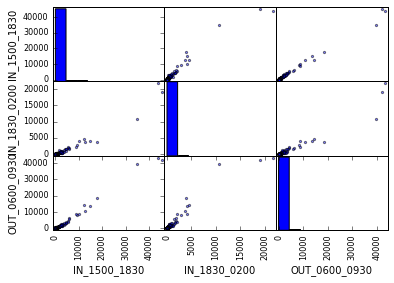

In [73]:
pd.scatter_matrix(scat_dat)

In [74]:
pd.scatter_matrix?

In [84]:
# learning models take X as a dataframe and y as a Series
people_out_am = trains2014.loc[:, ["OUT_0600_0930", "OUT_0930_1500"]]
people_in_pm = trains2014.IN_1500_1830

In [116]:
regressor = lin_model.RANSACRegressor(max_trials=1000000)

In [128]:
regressor.fit(people_out_am, people_in_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=1000000, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [129]:
predictions_for_pm = regressor.predict(people_out_am)

In [130]:
# check the data
predictions_for_pm;

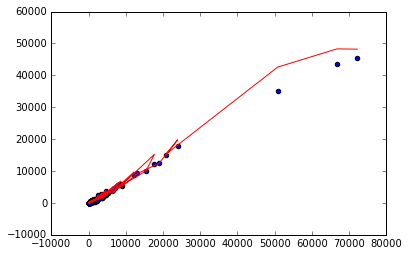

In [131]:
plt.scatter(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500, trains2014.IN_1500_1830)
plt.plot(trains2014.OUT_0600_0930 + trains2014.OUT_0930_1500, predictions_for_pm, color="red")

In [132]:
# get models parameters, ie the gradient
regressor.estimator_.coef_

array([ 1.02848295,  0.16443109])

In [133]:
# get the intercept
regressor.estimator_.intercept_

-2.7154627532535187

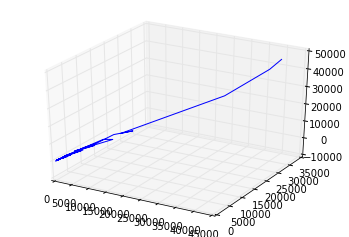

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = trains2014.OUT_0600_0930
y = trains2014.OUT_0930_1500
z = predictions_for_pm
ax.plot(x,y,z)